In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.head(4)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
dataset.isnull().sum().sum()

0

In [5]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


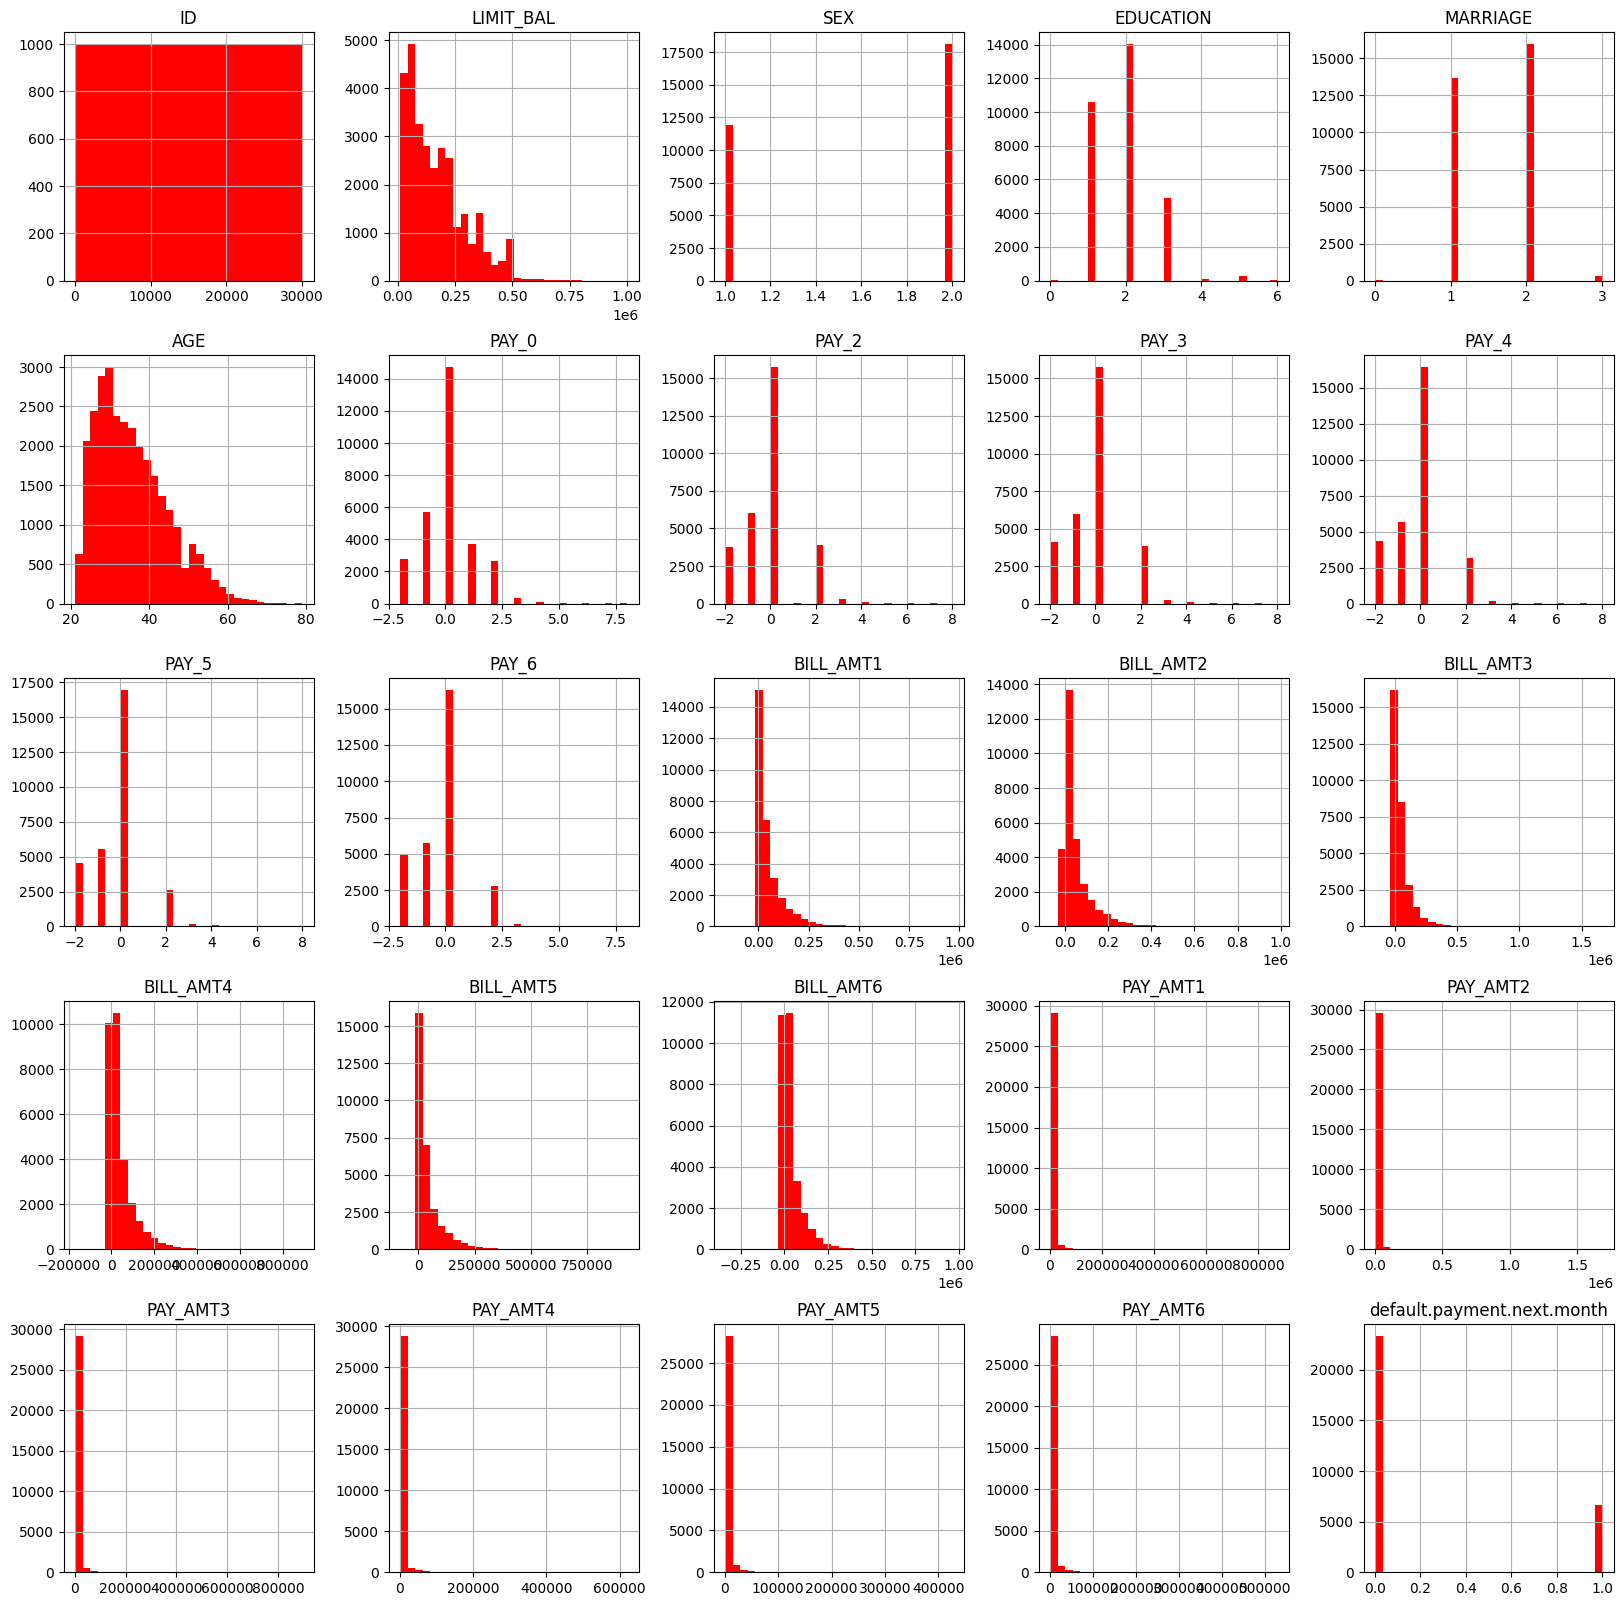

In [6]:
dataset.hist(bins=30,figsize=(20,20),color='r')
plt.show()

In [7]:
def_payment = dataset[dataset['default.payment.next.month'] == 1]
nondef_payment = dataset[dataset['default.payment.next.month'] == 0]

In [8]:
default = len(def_payment)
non_default = len(nondef_payment)
total_cus = default + non_default
precentage_cus_def = (default / total_cus) * 100
precentage_cus_nondef = (non_default / total_cus) * 100

print(f"Total Clients {total_cus}")
print(f"Default paying Clients {default}")
print(f"Non-default paying Clients {non_default}")
print(f"Precentage of default payers {precentage_cus_def}%")
print("Precentage of  non-default payers {:.2f}%".format(precentage_cus_nondef))

Total Clients 30000
Default paying Clients 6636
Non-default paying Clients 23364
Precentage of default payers 22.12%
Precentage of  non-default payers 77.88%


<AxesSubplot: >

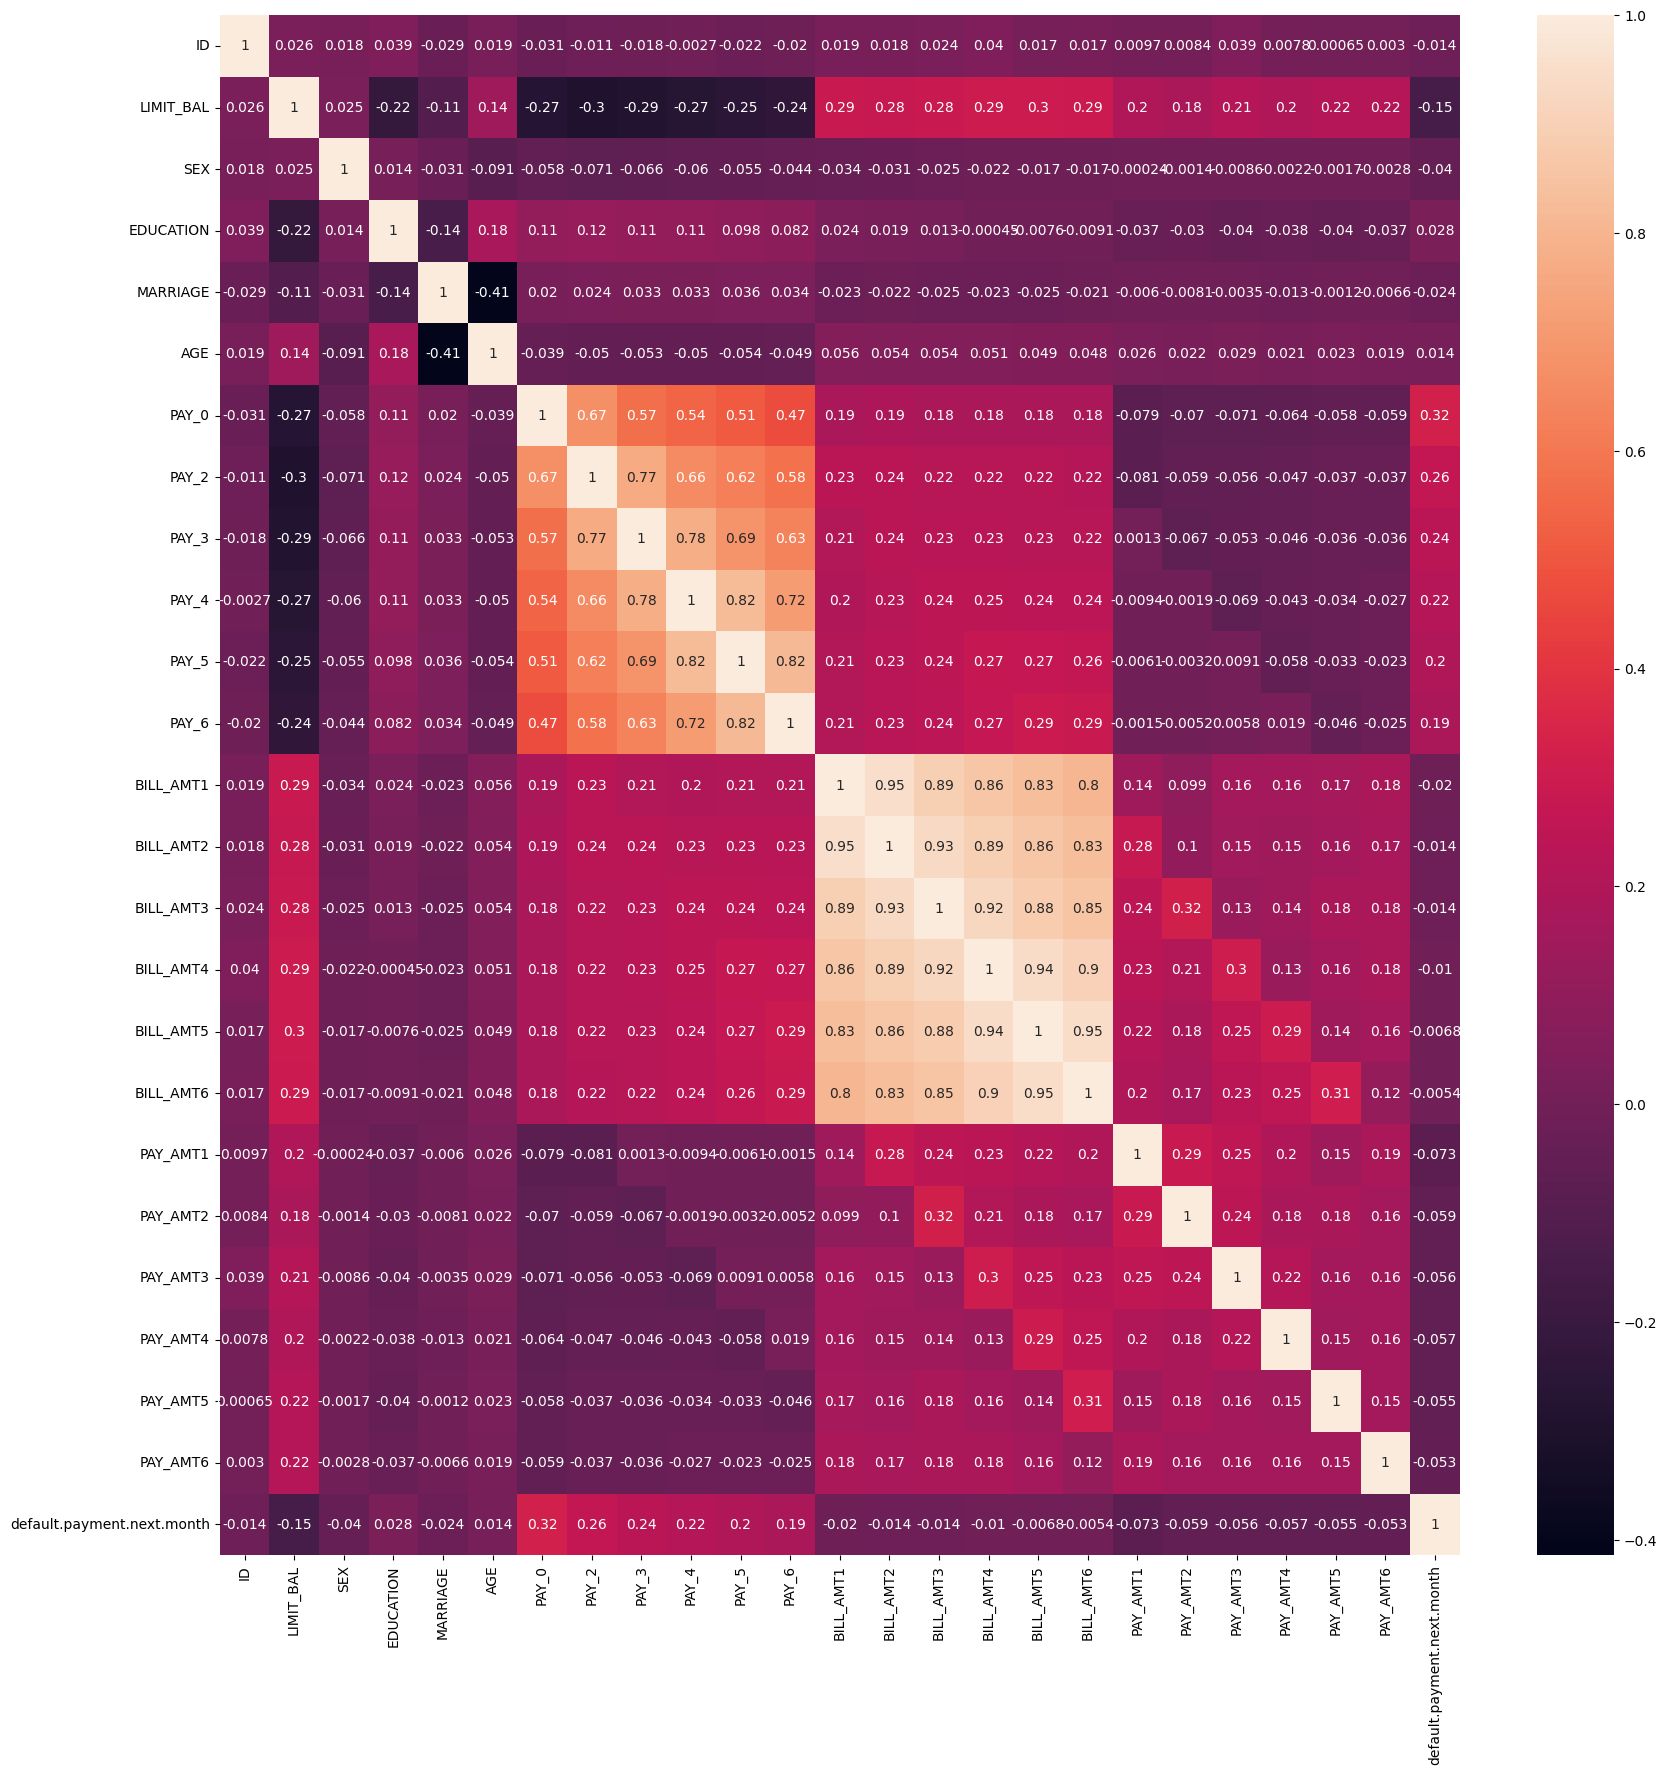

In [9]:
correlations = dataset.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations,annot=True) 

<AxesSubplot: xlabel='AGE', ylabel='count'>

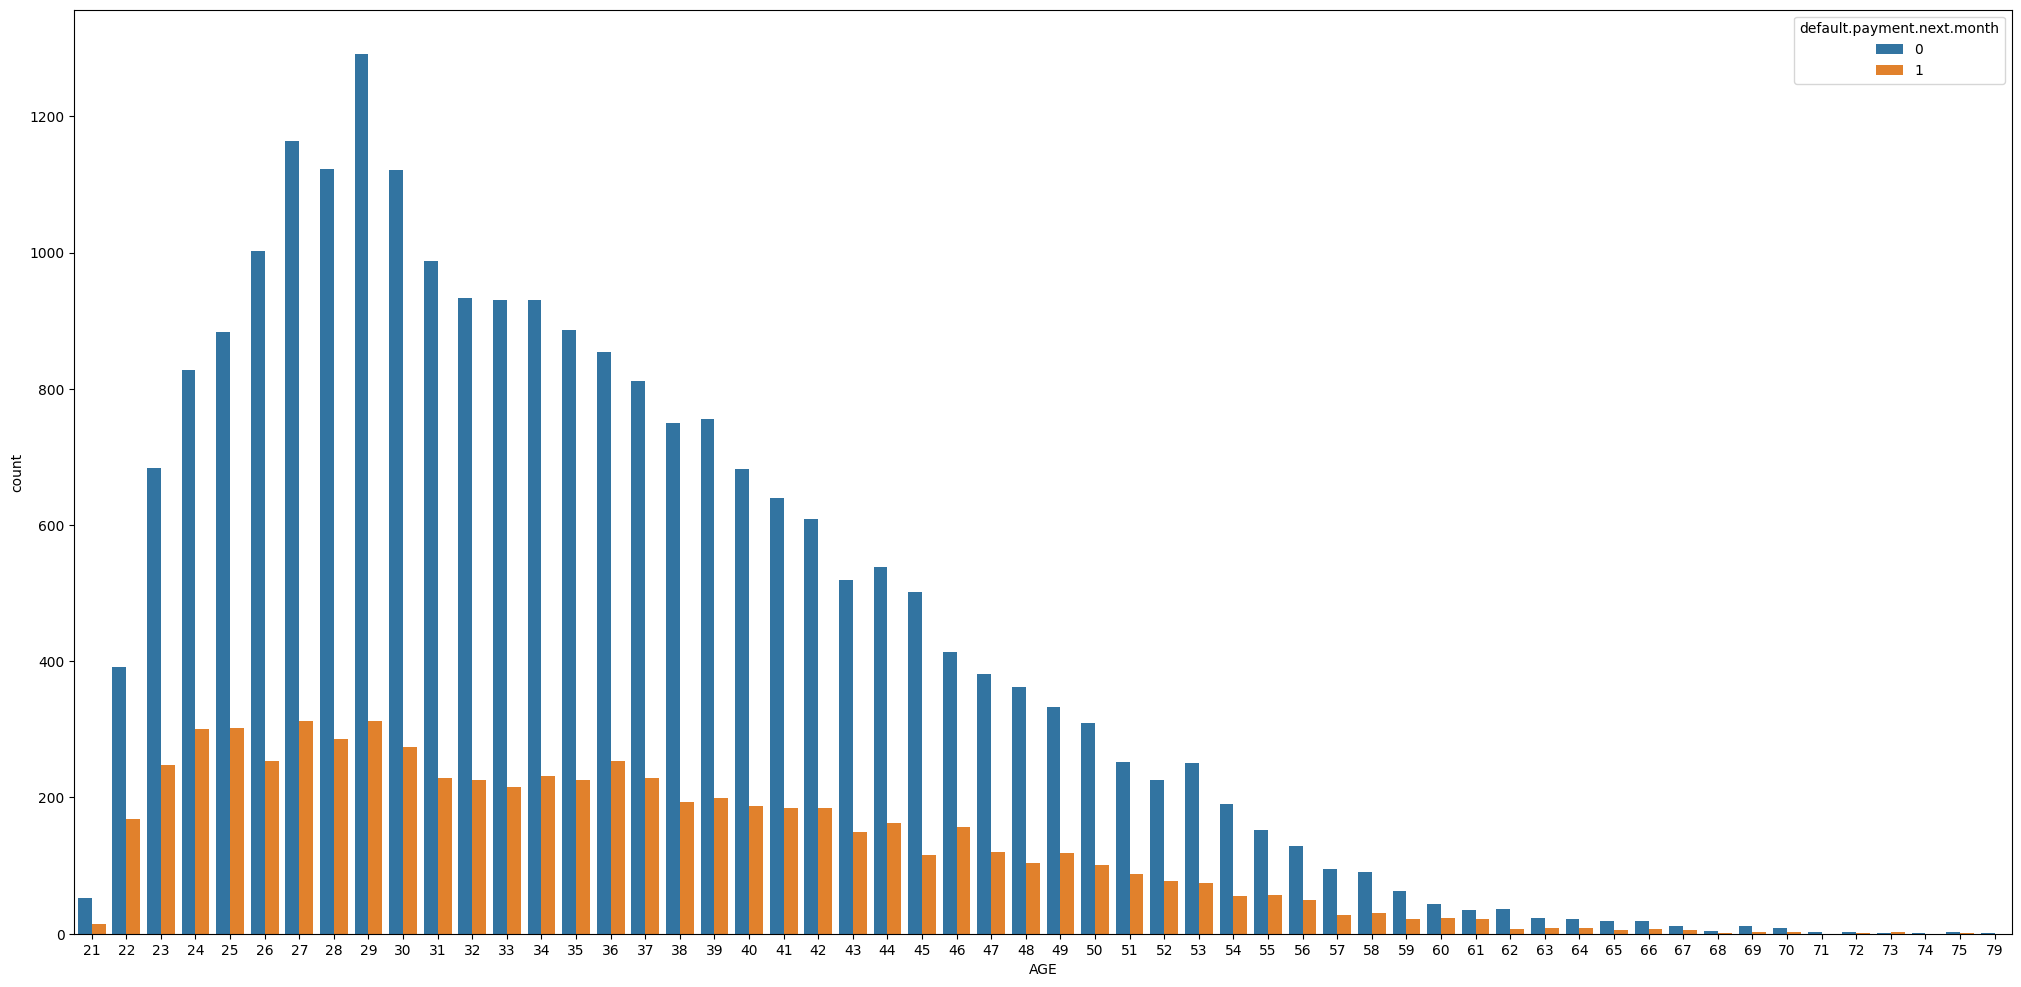

In [10]:
plt.figure(figsize=[25,12])
sns.countplot(x='AGE',data=dataset,hue='default.payment.next.month')

<AxesSubplot: xlabel='MARRIAGE', ylabel='count'>

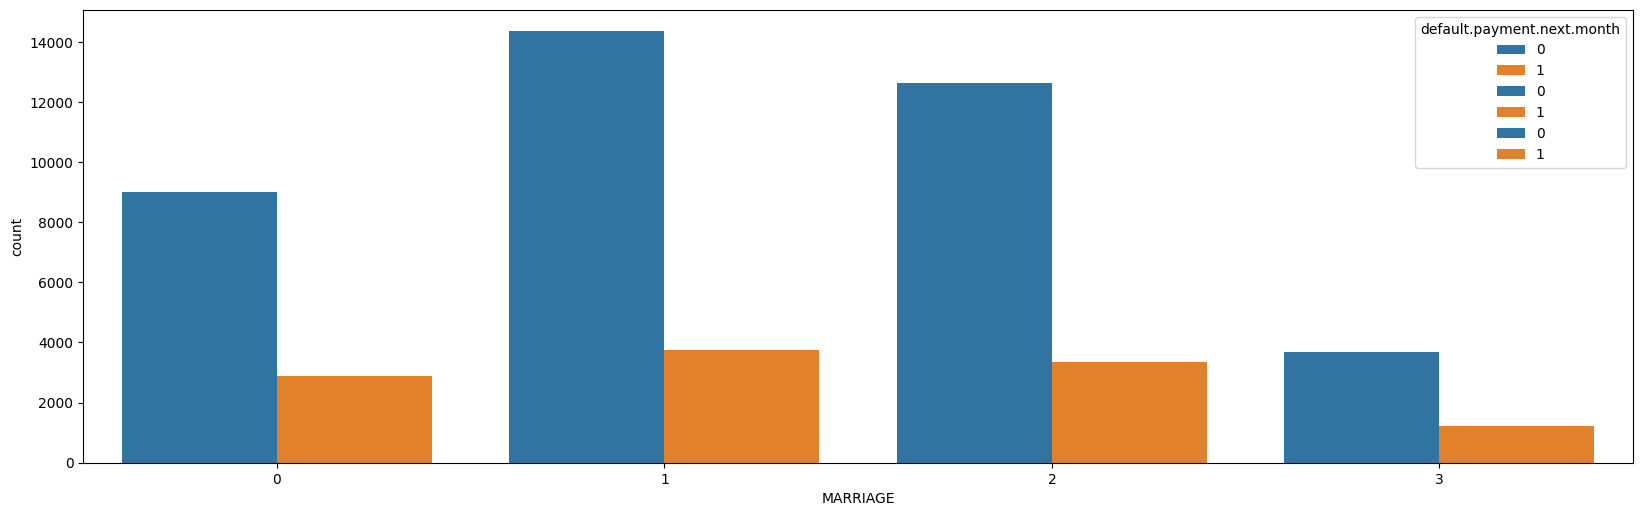

In [11]:
plt.figure(figsize=[20,20])
plt.subplot(311)
sns.countplot(x='EDUCATION',data=dataset,hue='default.payment.next.month')
plt.subplot(311)
sns.countplot(x='SEX',data=dataset,hue='default.payment.next.month')
plt.subplot(311)
sns.countplot(x='MARRIAGE',data=dataset,hue='default.payment.next.month')

In [12]:
x_cat = dataset[['SEX','EDUCATION','MARRIAGE']]
x_cat

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


In [13]:
from sklearn.preprocessing import OneHotEncoder

OCE = OneHotEncoder()
x_cat = OCE.fit_transform(x_cat).toarray()

In [14]:
x_cat.shape

(30000, 13)

In [15]:
x_cat = pd.DataFrame(x_cat)
x_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
x_num = []
for i in dataset.columns:
    if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
        x_num.append(i)
        
x_num = dataset[x_num]

In [17]:
x_all = pd.concat([x_cat,x_num],axis=1)
y = x_all['default.payment.next.month']
x_all.drop('default.payment.next.month',axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(x_all)

c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.25)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22500, 37)
(7500, 37)
(22500,)
(7500,)


In [21]:
import xgboost as xgb
model = xgb.XGBClassifier(objective='reg:squarederror',learningrate=.1,max_depth=5,n_estimators=100)
model.fit(x_train,y_train)

[18:34:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "learningrate" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              learningrate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='reg:squarederror', ...)

In [22]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
print("Accuracy {} %".format(100*accuracy_score(y_pred,y_test)))
print(classification_report(y_test,y_pred))

Accuracy 81.84 %
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5852
           1       0.66      0.37      0.47      1648

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500



In [24]:
model = xgb.XGBClassifier(objective='reg:squarederror',learningrate=.1,max_depth=20,n_estimators=500)
model.fit(x_train,y_train)

[18:34:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "learningrate" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              learningrate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='reg:squarederror', ...)

In [25]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [26]:
print("Accuracy {} %".format(100*accuracy_score(y_pred,y_test)))
print(classification_report(y_test,y_pred))

Accuracy 78.84 %
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5852
           1       0.53      0.38      0.44      1648

    accuracy                           0.79      7500
   macro avg       0.68      0.64      0.66      7500
weighted avg       0.77      0.79      0.78      7500



In [27]:
param_grid = {
    "gamma":[.5,1,5],
    'subsample':[.6,.8,1],
    'colsample_bytree':[.6,.8,1],
    'max_depth':[3,4,5]
}

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier(learning_rate=.01,n_estimators=100,objective='binary:logistic')
grid = GridSearchCV(xgb_model,param_grid,refit=True,verbose=4)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.822 total time=   1.9s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.816 total time=   1.7s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.808 total time=   1.8s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.819 total time=   1.8s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.817 total time=   2.1s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.823 total time=   1.8s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.815 total time=   1.6s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.808 total time=   1.8s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.819 tot

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1],
                         'gamma': [0.5, 1, 5], 'max_depth': [3, 4, 5],
                         'subsample': [0.6, 0.8, 1]},
             verbose=4)

In [29]:
y_predict = grid.predict(x_test)

In [30]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      5852
           1       0.69      0.35      0.47      1648

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.81      0.82      0.80      7500



In [31]:
train_data = pd.DataFrame({
    "Target":y_train
})

for i in range (x_train.shape[1]):
    train_data[i] = x_train[:,i]  

In [32]:
val_data = pd.DataFrame({
    "Target":y_test
})

for i in range(x_test.shape[1]):
    val_data[i] = x_test[:,i]

In [33]:
mse = mean_squared_error(y_test, y_predict)
mse

0.1772

In [34]:
train_data.to_csv("train.csv",header=False,index=False)
val_data.to_csv("test.csv",header=False,index=False)